# Object Detection Evaluation Metric Example

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

%matplotlib inline

ROOT_DIR = os.path.abspath('../')

## Sample Data Load
* Samples Follows

|| Sample-1 | Sample-2 | Sample-3 |
| :---: | :---: | :---: | :---: |
|Num of Object| 19 | 15 | 5 |
|Results| [![sample-1](../images/eval_metric_sample_1.png)](../images/eval_metric_sample_1.png) | [![sample-1](../images/eval_metric_sample_2.png)](../images/eval_metric_sample_2.png) | [![sample-3](../images/eval_metric_sample_3.png)](../images/eval_metric_sample_3.png) |

In [22]:
# Load Sample Evaluation Data
data_path = os.path.join(ROOT_DIR, 'files/evaluation_metric_sample_6.csv')
data = pd.read_csv(data_path)
# display(pd.DataFrame(data))

num_of_objects = [19, 15, 5, 10, 1, 1]

RESULTS = np.array(data)
NUM_OF_OBJECT = num_of_objects[int(os.path.splitext(os.path.basename(data_path))[0].split('_')[-1]) - 1]


In [23]:
def DisplayPrecisionAndRecall(x, y, title=''):
    plt.plot(x, y, linewidth='1.0', linestyle="-")
    plt.grid(alpha=.4,linestyle='--')
    plt.xlim(min(x), max(x))
    plt.ylim(0.0,1.1)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)

,recall,precision
0,1.0,1.000000
1,1.0,0.500000
2,1.0,0.333333
3,1.0,0.250000
4,1.0,0.200000
5,1.0,0.166667


/home/jhjung/satellite-imagery-obj-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


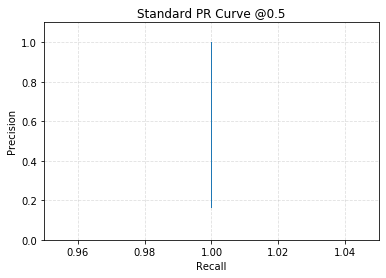

In [24]:
# Compute precision & recall
acc_tp = 0
acc_fp = 0

prec = []
rec = []

result_copy = RESULTS.copy()
while len(result_copy) > 0:
    idx = np.argmax(result_copy[:, 2])
    if result_copy[idx, 3] == 'TP':
        acc_tp += 1
    elif result_copy[idx, 3] == 'FP':
        acc_fp += 1

    result_copy = np.delete(result_copy, idx, axis = 0)
    prec.append(acc_tp / (acc_tp + acc_fp))
    rec.append(acc_tp / NUM_OF_OBJECT)
    
dataframe = pd.DataFrame({'recall' : rec, 'precision': prec})
display(pd.DataFrame(dataframe))

DisplayPrecisionAndRecall(rec, prec, 'Standard PR Curve @0.5')

## Compute AP Using 11-point interpolation
![11-point-ap](../images/equation/11-point-ap.png)
![11-point-interp](../images/equation/11-point_interp.png)

11-point interpolation AP :: 100.00%


,recall,precision
0,0.0,1.0
1,0.1,1.0
2,0.2,1.0
3,0.3,1.0
4,0.4,1.0
5,0.5,1.0
6,0.6,1.0
7,0.7,1.0
8,0.8,1.0
9,0.9,1.0


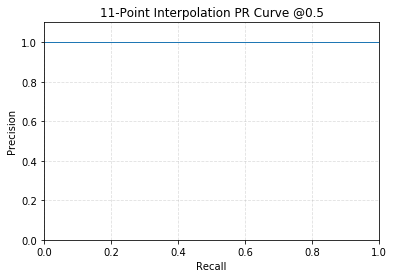

In [25]:
# Compute AP using 11-point interpolation
eleven_prec = np.array([])
eleven_rec = np.arange(0, 1.1, 0.1)
group = np.stack([prec, rec], axis=1)

for ele in eleven_rec:
    samples = np.where(group[:, 1] >= ele, group[:,0], 0)
    eleven_prec = np.append(eleven_prec, np.max(samples))

AP = np.mean(eleven_prec)
print('11-point interpolation AP :: {:0.2f}%'.format(AP * 100))

DisplayPrecisionAndRecall(eleven_rec, eleven_prec, '11-Point Interpolation PR Curve @0.5')

dataframe = pd.DataFrame({'recall' : eleven_rec, 'precision': eleven_prec})
display(pd.DataFrame(dataframe))

## Compute AP Using Every-point interpolation
![every-point-ap](../images/equation/every_point_ap.png)
![every-point-interp](../images/equation/every_point_interp.png)

every-point interpolation AP :: 50.00%


,recall,precision
0,0.0,0.5
1,1.0,0.5


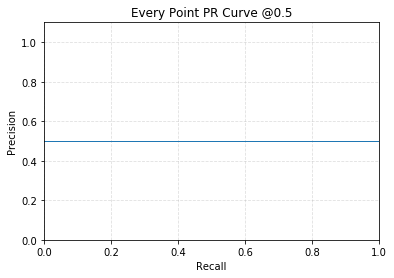

In [12]:
# Compute AP using every-point interpolation(ACU, Area Under Curve AUC)
every_prec = np.array([])
every_rec = np.unique(rec)
group = np.stack([prec, rec], axis=1)
for ele in every_rec:
    samples = np.where(group[:, 1] >= ele, group[:,0], 0)
    every_prec = np.append(every_prec, np.max(samples))

AP = 0
every_rec = np.insert(every_rec, 0, 0.0)
for i in range(1, len(every_rec)):
    AP += (every_rec[i] - every_rec[i - 1]) * every_prec[i - 1]
every_rec = np.delete(every_rec, 0)

print('every-point interpolation AP :: {:0.2f}%'.format(AP * 100))
DisplayPrecisionAndRecall(every_rec, every_prec, 'Every Point PR Curve @0.5')

dataframe = pd.DataFrame({'recall' : every_rec, 'precision': every_prec})
display(pd.DataFrame(dataframe))

### Reference
* <https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173>
* <https://github.com/rafaelpadilla/Object-Detection-Metrics>